In [121]:
import matplotlib.pyplot as plt
import numpy as np
import MIME_correction

In [122]:
def get_pool_data(first_round_targets : str, second_round_targets : str):
    path = "/datadisk/MIME/depth_test/"
    ground_truth = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/ground_truth.csv", delimiter=",")
    round_1 = np.log(np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/effects.csv", delimiter=","))
    round_2 = np.log(np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/effects.csv", delimiter=","))

    path_unbound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/non_selected/pairwise_count.csv"
    path_unbound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/non_selected/pairwise_count.csv"
    path_bound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/selected/pairwise_count.csv"
    path_bound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/selected/pairwise_count.csv"

    frequency_matrix_r1 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r1, path_bound_pairwise_counts_r1)
    frequency_matrix_r2 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r2, path_bound_pairwise_counts_r2)

    corrected_round_1 = np.linalg.solve(frequency_matrix_r1, round_1)
    corrected_round_2 = np.linalg.solve(frequency_matrix_r2, round_2)

    return ground_truth, np.exp(round_1), np.exp(round_2), np.exp(corrected_round_1), np.exp(corrected_round_2)

In [123]:
ground_truths = []
round_1s = []
round_2s = []
corrected_round_1s = []
corrected_round_2s = []

for first_round_targets in ["0.1", "1", "10"]:
    for second_round_targets in ["0.1", "1", "10"]:
        ground_truth, round_1, round_2, corrected_round_1, corrected_round_2 = get_pool_data(first_round_targets, second_round_targets)
        ground_truths.append(ground_truth)
        round_1s.append(round_1)
        round_2s.append(round_2)
        corrected_round_1s.append(corrected_round_1)
        corrected_round_2s.append(corrected_round_2)
        
        

frequency matrix
(60, 60)
matrix is full rank
condition number of matrix:  1.0091320143555504
[[ 1.  0.  0. -0. -0. -0.  0.  0. -0.]
 [ 0.  1.  0. -0. -0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -0.]
 [-0. -0.  0.  1.  0.  0.  0.  0.  0.]
 [-0. -0.  0.  0.  1.  0. -0.  0. -0.]
 [-0.  0.  0.  0.  0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0. -0. -0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [-0.  0. -0.  0. -0. -0.  0.  0.  1.]]
frequency matrix
(60, 60)
matrix is full rank
condition number of matrix:  1.030396577580544
[[ 1.  0.  0. -0. -0. -0. -0. -0. -0.]
 [ 0.  1.  0.  0. -0. -0.  0. -0. -0.]
 [ 0.  0.  1.  0.  0. -0. -0.  0.  0.]
 [-0.  0.  0.  1.  0.  0. -0. -0. -0.]
 [-0. -0.  0.  0.  1.  0. -0.  0. -0.]
 [-0. -0. -0.  0.  0.  1. -0.  0. -0.]
 [-0.  0. -0. -0. -0. -0.  1.  0.  0.]
 [-0. -0.  0. -0.  0.  0.  0.  1.  0.]
 [-0. -0.  0. -0. -0. -0.  0.  0.  1.]]
frequency matrix
(60, 60)
matrix is full rank
condition number of matrix:  1.0089719177571936
[[ 1.  0.  0.  

squared error for inferred Kds
0.154
0.464
0.519
squared error for corrected Kds
0.13
0.433
0.486
difference between squared error for inferred Kds and corrected Kds
0.023
0.031
0.032


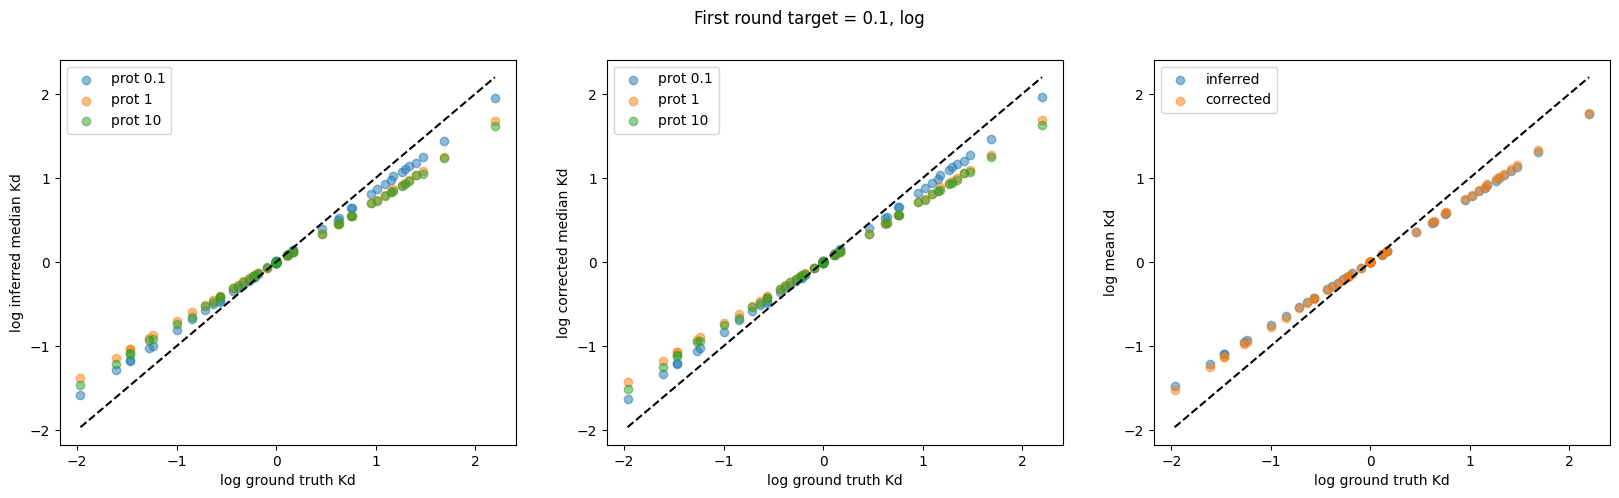

squared error for mean of inferred Kds and corrected Kds
0.357
0.327
difference between squared error for mean of inferred Kds and corrected Kds
0.03


In [124]:
MIME_correction.comparison_plot(ground_truths[0],round_2s[0],round_2s[1],round_2s[2],corrected_round_2s[0],corrected_round_2s[1],corrected_round_2s[2], "First round target = 0.1")

squared error for inferred Kds
0.257
0.545
0.639
squared error for corrected Kds
0.127
0.4
0.49
difference between squared error for inferred Kds and corrected Kds
0.13
0.145
0.149


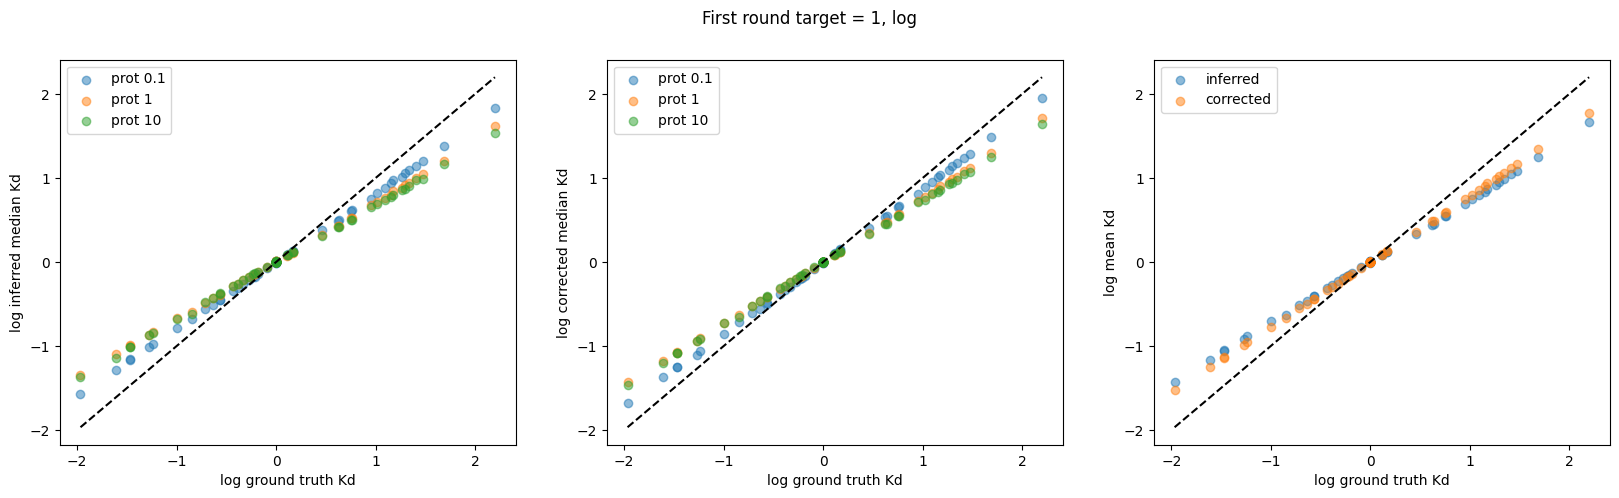

squared error for mean of inferred Kds and corrected Kds
0.464
0.317
difference between squared error for mean of inferred Kds and corrected Kds
0.148


In [125]:
MIME_correction.comparison_plot(ground_truths[3],round_2s[3],round_2s[4],round_2s[5],corrected_round_2s[3],corrected_round_2s[4],corrected_round_2s[5], "First round target = 1")

squared error for inferred Kds
0.33
0.687
0.898
squared error for corrected Kds
0.046
0.347
0.57
difference between squared error for inferred Kds and corrected Kds
0.283
0.34
0.327


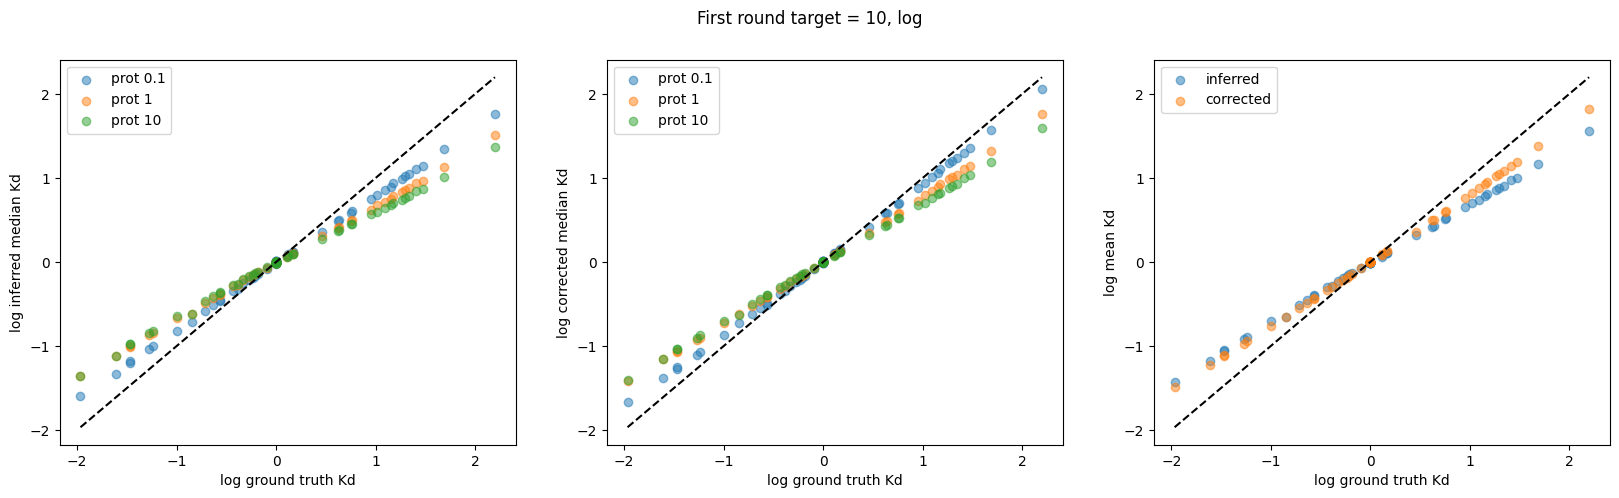

squared error for mean of inferred Kds and corrected Kds
0.614
0.27
difference between squared error for mean of inferred Kds and corrected Kds
0.343


In [126]:
MIME_correction.comparison_plot(ground_truths[6],round_2s[6],round_2s[7],round_2s[8],corrected_round_2s[6],corrected_round_2s[7],corrected_round_2s[8], "First round target = 10")

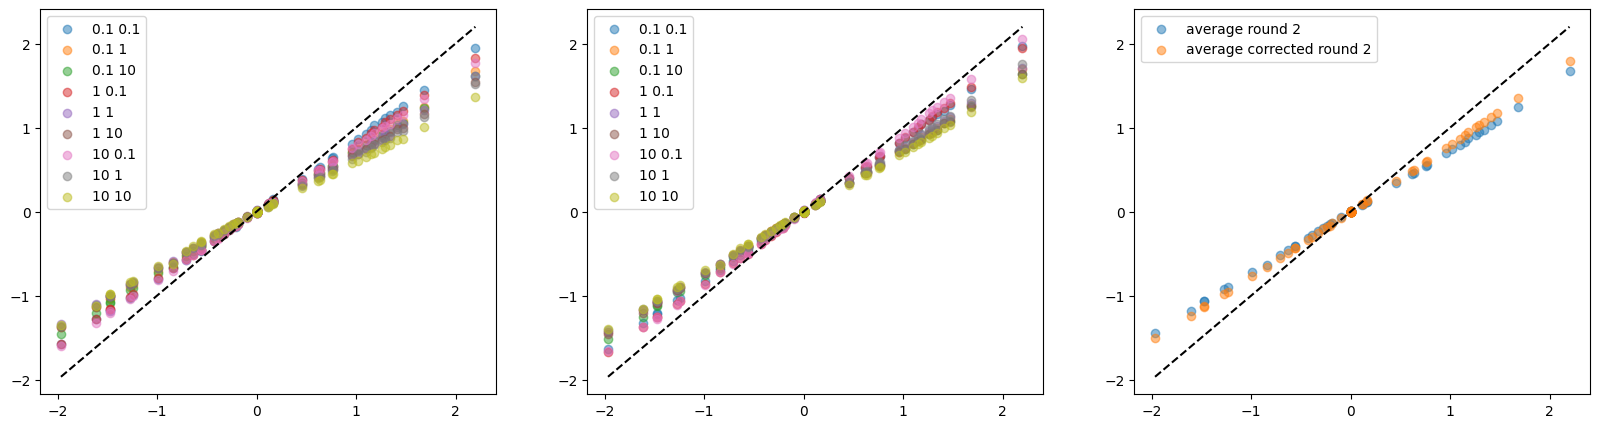

In [127]:
# plot all corrected rounds in one plot
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.scatter(np.log(ground_truths[0]), np.log(round_2s[0]), label="0.1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[1]), np.log(round_2s[1]), label="0.1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[2]), np.log(round_2s[2]), label="0.1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[3]), np.log(round_2s[3]), label="1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[4]), np.log(round_2s[4]), label="1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[5]), np.log(round_2s[5]), label="1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[6]), np.log(round_2s[6]), label="10 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[7]), np.log(round_2s[7]), label="10 1", alpha=.5)
ax1.scatter(np.log(ground_truths[8]), np.log(round_2s[8]), label="10 10", alpha=.5)
ax1.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax1.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

ax2.scatter(np.log(ground_truths[0]), np.log(corrected_round_2s[0]), label="0.1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[1]), np.log(corrected_round_2s[1]), label="0.1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[2]), np.log(corrected_round_2s[2]), label="0.1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[3]), np.log(corrected_round_2s[3]), label="1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[4]), np.log(corrected_round_2s[4]), label="1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[5]), np.log(corrected_round_2s[5]), label="1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[6]), np.log(corrected_round_2s[6]), label="10 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[7]), np.log(corrected_round_2s[7]), label="10 1", alpha=.5)
ax2.scatter(np.log(ground_truths[8]), np.log(corrected_round_2s[8]), label="10 10", alpha=.5)
ax2.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax2.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# plot the averages of corrected and uncorrected
round_2s = np.array(round_2s)
corrected_round_2s = np.array(corrected_round_2s)
ground_truths = np.array(ground_truths)

average_round_2 = np.mean(round_2s, axis=0)
average_corrected_round_2 = np.mean(corrected_round_2s, axis=0)
average_ground_truth = np.mean(ground_truths, axis=0)

ax3.scatter(np.log(average_ground_truth), np.log(average_round_2), label="average round 2", alpha=.5)
ax3.scatter(np.log(average_ground_truth), np.log(average_corrected_round_2), label="average corrected round 2", alpha=.5)
ax3.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(average_ground_truth)), np.max(np.log(average_ground_truth)), 100)
y = x
ax3.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

plt.show()

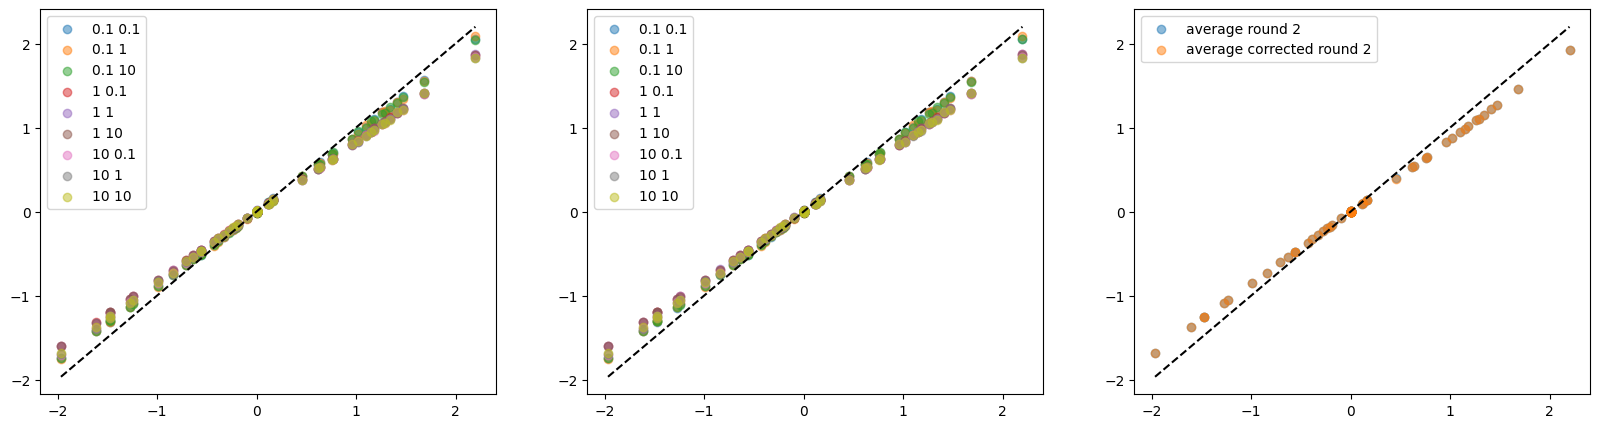

In [128]:
# plot all corrected rounds in one plot
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.scatter(np.log(ground_truths[0]), np.log(round_1s[0]), label="0.1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[1]), np.log(round_1s[1]), label="0.1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[2]), np.log(round_1s[2]), label="0.1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[3]), np.log(round_1s[3]), label="1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[4]), np.log(round_1s[4]), label="1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[5]), np.log(round_1s[5]), label="1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[6]), np.log(round_1s[6]), label="10 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[7]), np.log(round_1s[7]), label="10 1", alpha=.5)
ax1.scatter(np.log(ground_truths[8]), np.log(round_1s[8]), label="10 10", alpha=.5)
ax1.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax1.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

ax2.scatter(np.log(ground_truths[0]), np.log(corrected_round_1s[0]), label="0.1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[1]), np.log(corrected_round_1s[1]), label="0.1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[2]), np.log(corrected_round_1s[2]), label="0.1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[3]), np.log(corrected_round_1s[3]), label="1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[4]), np.log(corrected_round_1s[4]), label="1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[5]), np.log(corrected_round_1s[5]), label="1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[6]), np.log(corrected_round_1s[6]), label="10 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[7]), np.log(corrected_round_1s[7]), label="10 1", alpha=.5)
ax2.scatter(np.log(ground_truths[8]), np.log(corrected_round_1s[8]), label="10 10", alpha=.5)
ax2.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax2.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# plot the averages of corrected and uncorrected
round_1s = np.array(round_1s)
corrected_round_1s = np.array(corrected_round_1s)
ground_truths = np.array(ground_truths)

average_round_1 = np.mean(round_1s, axis=0)
average_corrected_round_1 = np.mean(corrected_round_1s, axis=0)
average_ground_truth = np.mean(ground_truths, axis=0)

ax3.scatter(np.log(average_ground_truth), np.log(average_round_1), label="average round 2", alpha=.5)
ax3.scatter(np.log(average_ground_truth), np.log(average_corrected_round_1), label="average corrected round 2", alpha=.5)
ax3.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(average_ground_truth)), np.max(np.log(average_ground_truth)), 100)
y = x
ax3.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

plt.show()